# Question 1: Structural Analysis of Political Power

**Student:** Erfan Shahabi (810103166)

In [1]:
import os
import sys

# Add parent directory to path
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

print(f"Working directory: {os.getcwd()}")
print(f"Parent directory added: {parent_dir}")

Working directory: /Users/erfan/Documents/University/Social Networks/SN_HW2_810103166/notebooks
Parent directory added: /Users/erfan/Documents/University/Social Networks/SN_HW2_810103166


In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Direct imports from src
from src.question1 import centrality
from src.question1 import analysis
from src.question1 import bottlenecks
from src.question1 import efficiency
from src.question1 import bonacich
from src.question1 import visualization



## Load Data

In [4]:
# Load edge list
edges_df = pd.read_csv('../data/politician_edges.csv')
print(f"Edges: {len(edges_df)}")
print(edges_df.head())

# Load node attributes
nodes_df = pd.read_csv('../data/politician_nodes.csv')
print(f"\nNodes: {len(nodes_df)}")
print(nodes_df.head())

Edges: 36836
   id_1   id_2
0     4  13645
1     4  20876
2     4  11446
3     4  16203
4     4   2830

Nodes: 5696
   id       facebook_id                          page_name   page_type
0   4  1408935539376139  Mark Bailey MP - Labor for Miller  politician
1   5   134464673284112                Victor Dominello MP  politician
2   6   282657255260177               Jean-Claude Poissant  politician
3   7   239338246176789             Deputado Ademir Camilo  politician
4  11   837707072929819                      Eliziane Gama  politician


In [5]:
# Create graph
G = nx.from_pandas_edgelist(edges_df, source='id_1', target='id_2')

# Add node attributes
if 'id' in nodes_df.columns:
    node_attrs = nodes_df.set_index('id').to_dict('index')
    nx.set_node_attributes(G, node_attrs)

print(f"Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Connected: {nx.is_connected(G)}")

Graph: 5696 nodes, 36836 edges
Connected: True


## Part (a): Power Geometry

### 1. Centrality Calculations

In [6]:
# Calculate all centralities
centralities = centrality.calculate_all_centralities(G)

# Create summary dataframe
summary_df = pd.DataFrame({
    'node': list(centralities['degree'].keys()),
    'degree': list(centralities['degree'].values()),
    'eigenvector': list(centralities['eigenvector'].values()),
    'closeness': list(centralities['closeness'].values())
})

summary_df['deg_rank'] = summary_df['degree'].rank(ascending=False)
summary_df['eig_rank'] = summary_df['eigenvector'].rank(ascending=False)
summary_df['close_rank'] = summary_df['closeness'].rank(ascending=False)

print("Top 10 by Degree:")
print(summary_df.nsmallest(10, 'deg_rank')[['node', 'degree', 'deg_rank']])

print("\nTop 10 by Eigenvector:")
print(summary_df.nsmallest(10, 'eig_rank')[['node', 'eigenvector', 'eig_rank']])

print("\nTop 10 by Closeness:")
print(summary_df.nsmallest(10, 'close_rank')[['node', 'closeness', 'close_rank']])

Top 10 by Degree:
      node    degree  deg_rank
97   14650  0.056716       1.0
809  20415  0.044425       2.0
786  21491  0.038982       3.0
788   3070  0.038455       4.0
791   7357  0.037928       5.0
389  11003  0.034416       6.0
547  18155  0.032485       7.0
427  18819  0.031080       8.0
438  17056  0.030553       9.0
150  16809  0.030202      10.0

Top 10 by Eigenvector:
       node  eigenvector  eig_rank
786   21491     0.183731       1.0
788    3070     0.180991       2.0
791    7357     0.177871       3.0
782   16427     0.167318       4.0
790    9363     0.166723       5.0
775   22100     0.155757       6.0
827    8893     0.149876       7.0
427   18819     0.146286       8.0
792   22110     0.143444       9.0
1200   8351     0.142743      10.0

Top 10 by Closeness:
       node  closeness  close_rank
389   11003   0.352217         1.0
437    3906   0.309343         2.0
427   18819   0.307406         3.0
1821  19877   0.302042         4.0
55    14862   0.299642         5.0


### 2. Gap Analysis

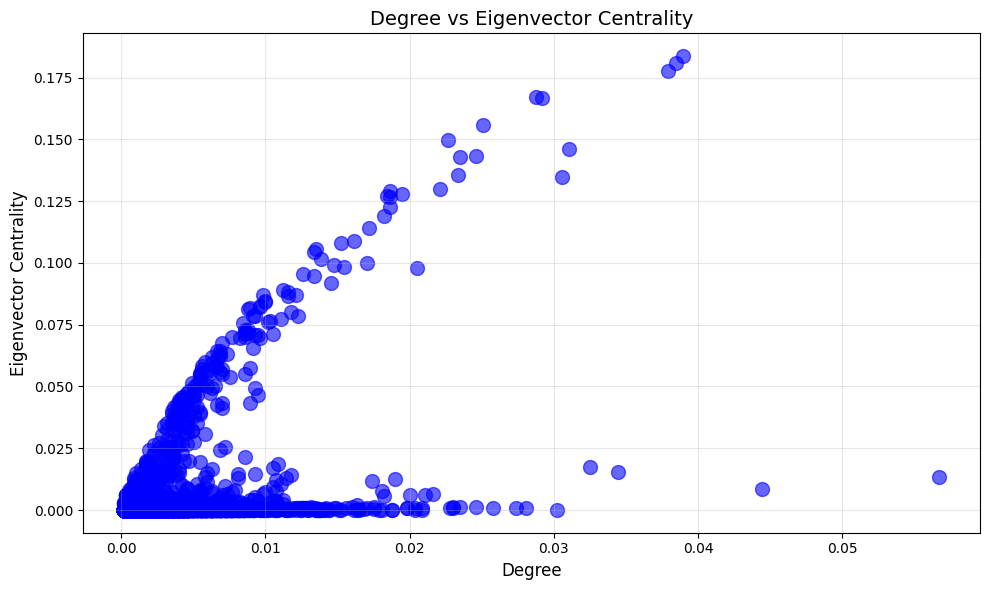


Nodes with significant deviation:
       node    degree  eigenvector  degree_rank  eig_rank
786   21491  0.038982     0.183731          3.0       1.0
788    3070  0.038455     0.180991          4.0       2.0
791    7357  0.037928     0.177871          5.0       3.0
782   16427  0.028797     0.167318         12.0       4.0
790    9363  0.029148     0.166723         11.0       5.0
775   22100  0.025110     0.155757         16.0       6.0
827    8893  0.022651     0.149876         25.0       7.0
427   18819  0.031080     0.146286          8.0       8.0
792   22110  0.024583     0.143444         17.5       9.0
1200   8351  0.023529     0.142743         19.5      10.0
780    9554  0.023354     0.135487         21.0      11.0
438   17056  0.030553     0.134698          9.0      12.0
443   11719  0.022125     0.130086         26.0      13.0
1449  11585  0.018613     0.128920         42.0      14.0
771   17340  0.019491     0.128070         37.0      15.0
1575   9164  0.018437     0.127081   

In [7]:
gap_df = analysis.gap_analysis(centralities)

fig = visualization.plot_degree_eigenvector_scatter(gap_df)
plt.show()

print("\nNodes with significant deviation:")
print(gap_df.head(20))

### 3. Hub Analysis

In [8]:
# Find anomalies: Low Degree but High Eigenvector
anomalies = analysis.identify_hub_anomalies(centralities, degree_threshold=100, eig_threshold=50)

print("Hub Anomalies (Low Degree, High Eigenvector):")
print(anomalies)

print("\nCloseness Analysis of Top 3 Anomalies:")
for idx, row in anomalies.head(3).iterrows():
    print(f"\nNode {row['node']}:")
    print(f"  Degree Rank: {row['degree_rank']:.0f}")
    print(f"  Eigenvector Rank: {row['eig_rank']:.0f}")
    print(f"  Closeness Rank: {row['close_rank']:.0f}")

Hub Anomalies (Low Degree, High Eigenvector):
       node    degree  eigenvector  closeness  degree_rank  eig_rank  \
1241  17495  0.012643     0.095334   0.250947        103.5      30.0   
777    7860  0.011238     0.089077   0.252875        130.5      33.0   
1196  15475  0.011589     0.088132   0.251058        122.0      34.0   
1397   8486  0.009833     0.087007   0.252281        177.0      35.0   
1399  10129  0.012116     0.086824   0.251036        114.0      36.0   
1691   9562  0.011589     0.086582   0.249638        122.0      37.0   
1403   2825  0.010009     0.084610   0.248300        170.0      38.0   
821    2278  0.010009     0.084267   0.250506        170.0      39.0   
1180   5503  0.009658     0.082580   0.251702        185.5      40.0   
1407   8045  0.009658     0.082134   0.246004        185.5      41.0   
1409  10814  0.008955     0.081906   0.249573        220.0      42.0   
444   13175  0.008780     0.081389   0.282378        228.5      43.0   
445    8335  0.011

## Part (b): Information Bottlenecks

Top 10 Betweenness Centrality:
      node  betweenness  degree  closeness  bet_rank  deg_rank  close_rank
389  11003     0.416556     196   0.352217       1.0       6.0         1.0
398   5448     0.067820      61   0.293829       2.0     145.5        10.0
547  18155     0.060257     185   0.288647       3.0       7.0        16.0
118  11611     0.060161     123   0.282616       4.0      27.0        26.0
55   14862     0.056797     113   0.299642       5.0      35.5         5.0
97   14650     0.054810     323   0.282462       6.0       1.0        27.0
894  11149     0.047660     108   0.296800       7.0      38.0         8.0
111    365     0.045638      66   0.278430       8.0     122.0        42.0
427  18819     0.043659     177   0.307406       9.0       8.0         3.0
345   4300     0.037503      28   0.252628      10.0     679.5       289.0


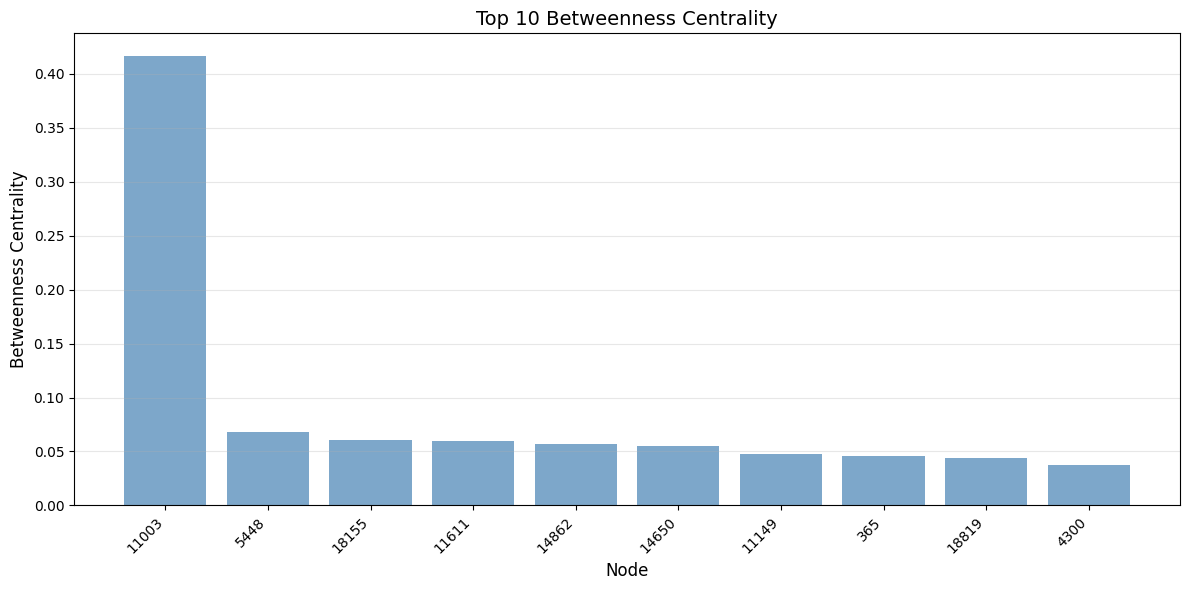

In [9]:
# Calculate betweenness
betweenness_df = bottlenecks.rank_gap_analysis(G, top_n=10)

print("Top 10 Betweenness Centrality:")
print(betweenness_df)

fig = visualization.plot_betweenness_ranking(betweenness_df, top_n=10)
plt.show()

In [16]:


mediators = betweenness_df.nsmallest(3, 'bet_rank')

print("Top 3 Mediators:")
for idx, row in mediators.iterrows():
    node_id = row['node']
    node_attrs = G.nodes[node_id]
    
    print(f"\nNode {node_id}:")
    print(f"  Name: {node_attrs.get('page_name', 'N/A')}")
    print(f"  Betweenness: {row['betweenness']:.4f} (Rank {row['bet_rank']:.0f})")
    print(f"  Degree: {row['degree']} (Rank {row['deg_rank']:.0f})")
    print(f"  Closeness: {row['closeness']:.4f} (Rank {row['close_rank']:.0f})")
    
    ego_g = efficiency.extract_ego_network(G, node_id)
    neighbors = list(ego_g.neighbors(node_id))
    neighbor_degrees = [G.degree(n) for n in neighbors]
    local_clustering = nx.clustering(G, node_id)
    
    print(f"  Ego network size: {len(neighbors)}")
    print(f"  Neighbor degree range: {min(neighbor_degrees)} - {max(neighbor_degrees)}")
    print(f"  Avg neighbor degree: {sum(neighbor_degrees)/len(neighbor_degrees):.1f}")
    print(f"  Local clustering: {local_clustering:.3f}")

Top 3 Mediators:

Node 11003.0:
  Name: Barack Obama
  Betweenness: 0.4166 (Rank 1)
  Degree: 196.0 (Rank 6)
  Closeness: 0.3522 (Rank 1)
  Ego network size: 196
  Neighbor degree range: 1 - 177
  Avg neighbor degree: 23.0
  Local clustering: 0.012

Node 5448.0:
  Name: Hillary Clinton
  Betweenness: 0.0678 (Rank 2)
  Degree: 61.0 (Rank 146)
  Closeness: 0.2938 (Rank 10)
  Ego network size: 61
  Neighbor degree range: 1 - 177
  Avg neighbor degree: 26.1
  Local clustering: 0.011

Node 18155.0:
  Name: Angela Merkel
  Betweenness: 0.0603 (Rank 3)
  Degree: 185.0 (Rank 7)
  Closeness: 0.2886 (Rank 16)
  Ego network size: 185
  Neighbor degree range: 1 - 323
  Avg neighbor degree: 30.9
  Local clustering: 0.073


## Part (c): Efficient Monitors

Efficient Monitors:
       node  closeness  norm_degree  degree  close_rank  deg_rank
1821  19877   0.302042     0.007902      45         4.0     284.0
1215   6357   0.299280     0.011238      64         6.0     130.5
398    5448   0.293829     0.010711      61        10.0     145.5
858   13735   0.292141     0.007902      45        11.0     284.0
2579  11999   0.291453     0.006673      38        12.0     415.5
3344  20259   0.291379     0.003863      22        13.0     964.0
445    8335   0.288940     0.011765      67        14.0     118.0
862   20708   0.288764     0.004214      24        15.0     852.0
1823  22438   0.288034     0.004565      26        17.0     750.5
629   15259   0.287554     0.003161      18        18.0    1236.5
1903   4978   0.284380     0.004565      26        19.0     750.5
1857    720   0.284139     0.005443      31        20.0     588.0


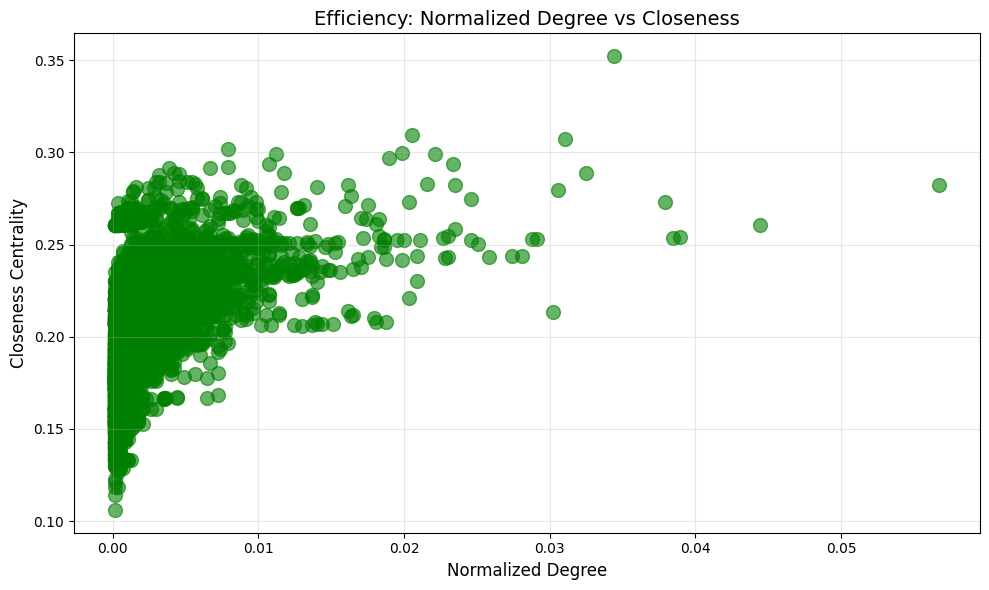

In [10]:
# Identify efficient monitors
efficient_df = efficiency.identify_efficient_monitors(G, top_closeness=20, degree_threshold=100)

print("Efficient Monitors:")
print(efficient_df)

# Plot scatter
all_nodes_df = pd.DataFrame({
    'node': list(G.nodes()),
    'norm_degree': [centralities['degree'][n] for n in G.nodes()],
    'closeness': [centralities['closeness'][n] for n in G.nodes()]
})

fig = visualization.plot_efficiency_scatter(all_nodes_df)
plt.show()


Ego Network of 19877.0:
  Nodes: 46
  Edges: 136


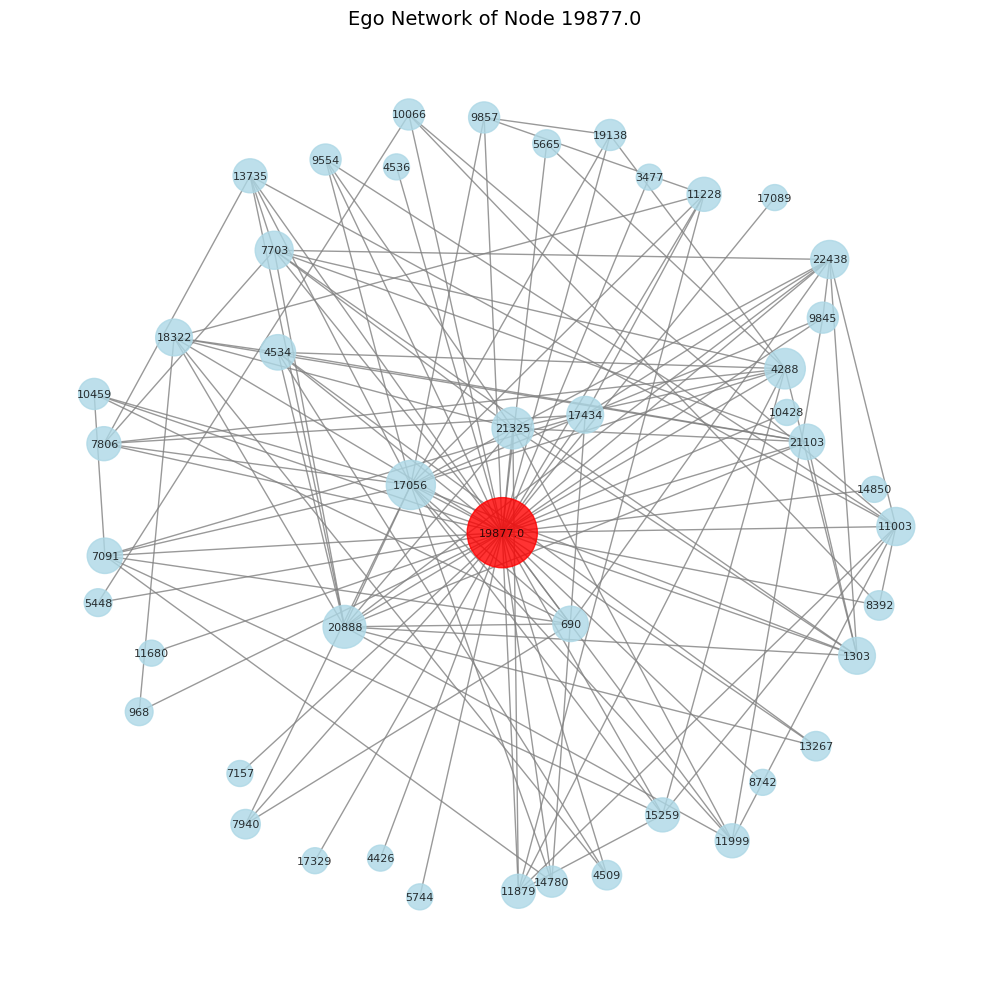


Ego Network of 6357.0:
  Nodes: 65
  Edges: 205


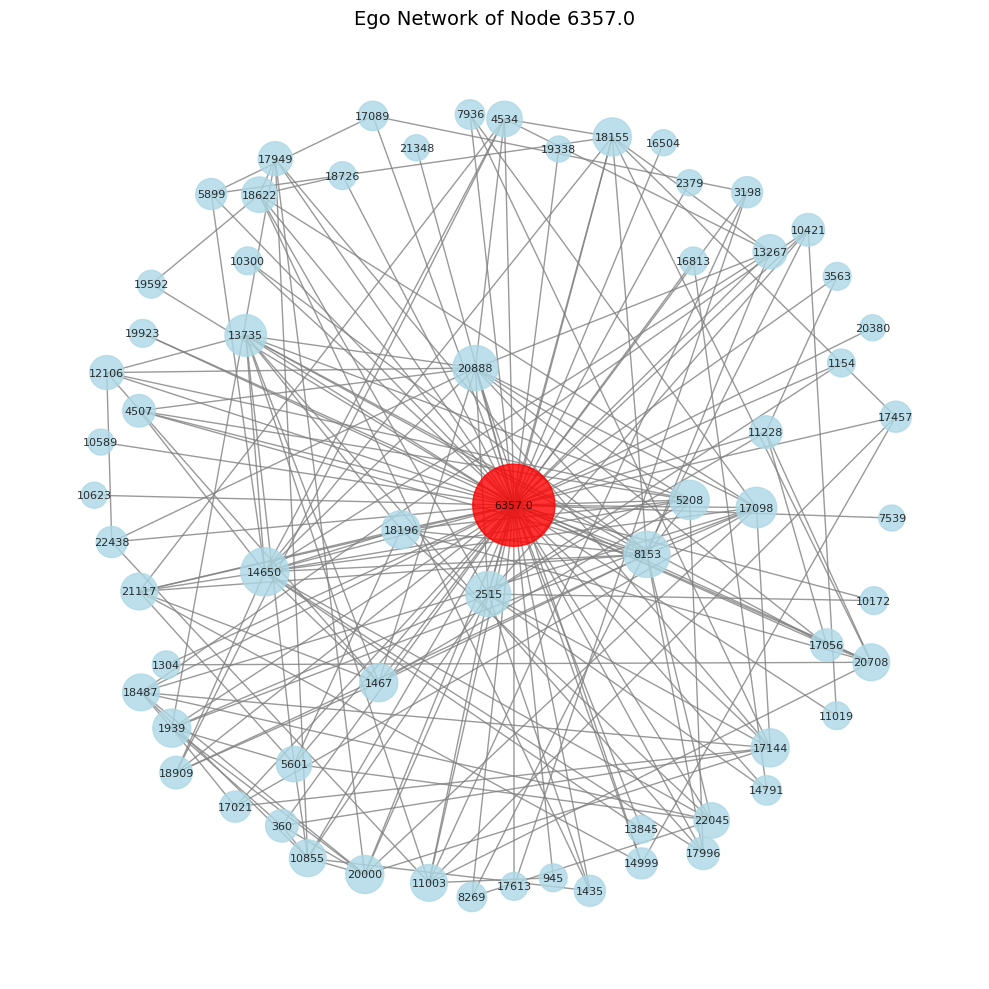


Ego Network of 5448.0:
  Nodes: 62
  Edges: 82


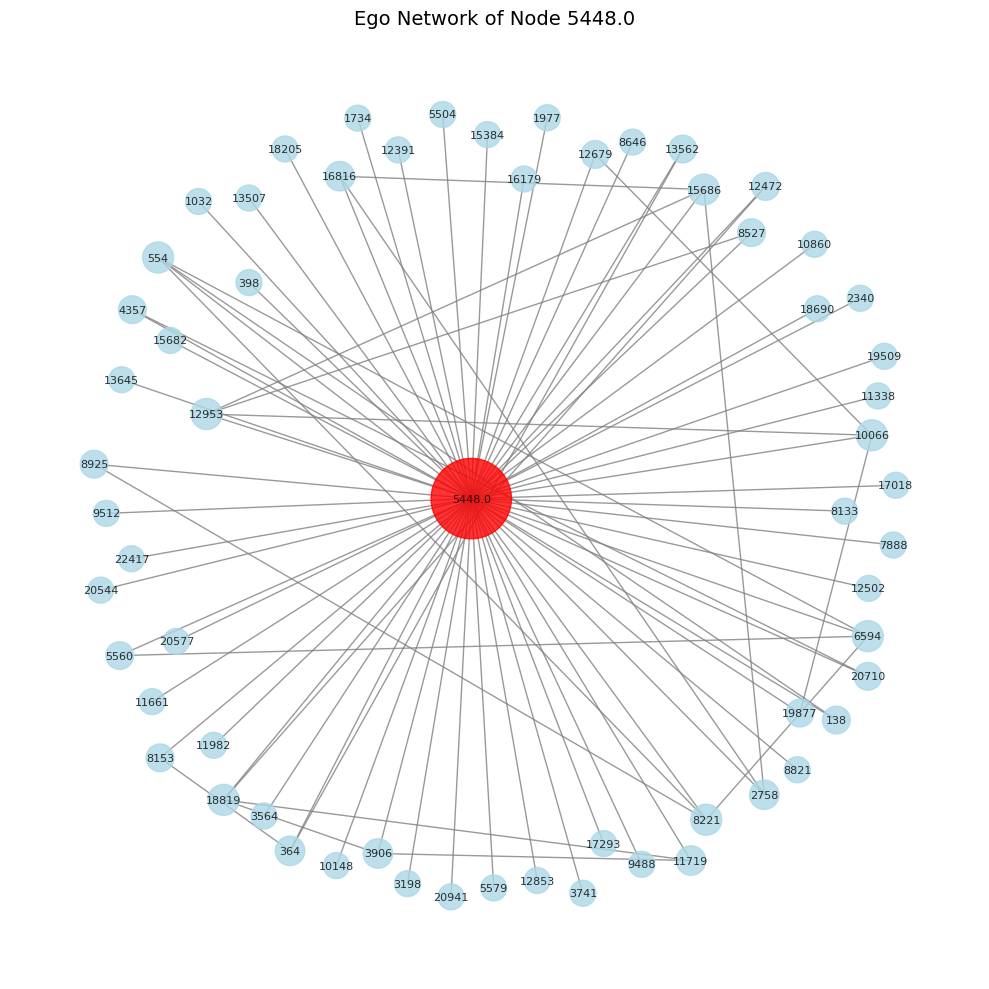

In [11]:
# Visualize ego networks
for idx, row in efficient_df.head(3).iterrows():
    node = row['node']
    ego_g = efficiency.extract_ego_network(G, node)
    
    print(f"\nEgo Network of {node}:")
    print(f"  Nodes: {ego_g.number_of_nodes()}")
    print(f"  Edges: {ego_g.number_of_edges()}")
    
    fig = visualization.plot_ego_network(G, ego_g, node, 
                                        save_path=f'../results/plots/ego_{node}.png')
    plt.show()

In [17]:


print("\nEgo Network Structural Analysis:")
for idx, row in efficient_df.head(3).iterrows():
    node_id = row['node']
    node_attrs = G.nodes[node_id]
    
    ego_g = efficiency.extract_ego_network(G, node_id)
    
    n_nodes = ego_g.number_of_nodes()
    n_edges = ego_g.number_of_edges()
    max_possible_edges = n_nodes * (n_nodes - 1) / 2
    density = n_edges / max_possible_edges if max_possible_edges > 0 else 0
    
    ego_subgraph = ego_g.copy()
    ego_subgraph.remove_node(node_id)
    avg_clustering = nx.average_clustering(ego_subgraph) if ego_subgraph.number_of_nodes() > 0 else 0
    
    ego_degrees = [ego_g.degree(n) for n in ego_g.nodes() if n != node_id]
    
    print(f"\nNode {node_id} - {node_attrs.get('page_name', 'N/A')}:")
    print(f"  Nodes: {n_nodes}, Edges: {n_edges}")
    print(f"  Density: {density:.3f}")
    print(f"  Neighbor clustering: {avg_clustering:.3f}")
    print(f"  Neighbor degree: {min(ego_degrees)}-{max(ego_degrees)} (avg: {sum(ego_degrees)/len(ego_degrees):.1f})")
    print(f"  Closeness: {row['closeness']:.4f}")
    print(f"  Normalized degree: {row['norm_degree']:.4f}")


Ego Network Structural Analysis:

Node 19877.0 - Tanja Fajon:
  Nodes: 46, Edges: 136
  Density: 0.131
  Neighbor clustering: 0.345
  Neighbor degree: 1-19 (avg: 5.0)
  Closeness: 0.3020
  Normalized degree: 0.0079

Node 6357.0 - Mariano Rajoy Brey:
  Nodes: 65, Edges: 205
  Density: 0.099
  Neighbor clustering: 0.232
  Neighbor degree: 1-18 (avg: 5.4)
  Closeness: 0.2993
  Normalized degree: 0.0112

Node 5448.0 - Hillary Clinton:
  Nodes: 62, Edges: 82
  Density: 0.043
  Neighbor clustering: 0.093
  Neighbor degree: 1-4 (avg: 1.7)
  Closeness: 0.2938
  Normalized degree: 0.0107


## Part (d): Bonacich Power

Bonacich Power Rankings:
       power_0  power_0.01  power_0.02  power_-0.01  power_-0.02  rank_0  \
4         41.0    1.798459  -19.142430     0.720902     0.577726   352.5   
13645     54.0    2.084413  -26.672850     0.648473     0.502450   192.5   
20876     32.0    1.731558  -22.600575     0.810968     0.754374   558.5   
11446     19.0    1.363576   -7.981319     0.868761     0.797554  1157.0   
16203     49.0    1.927414  -22.004306     0.656246     0.462632   238.0   
2830      19.0    1.379577   -9.017836     0.874756     0.818359  1157.0   
20624     33.0    1.603679  -12.601096     0.765155     0.631018   535.0   
21280     44.0    1.907775  -24.838360     0.711243     0.573921   300.0   
21538     25.0    1.467329   -9.864686     0.823964     0.723103   801.5   
1443      63.0    2.273930  -35.202871     0.575485     0.354132   135.0   

       rank_0.01  rank_0.02  rank_-0.01  rank_-0.02  
4          333.0     5611.0      5314.0      5285.0  
13645      196.0     5636.0   

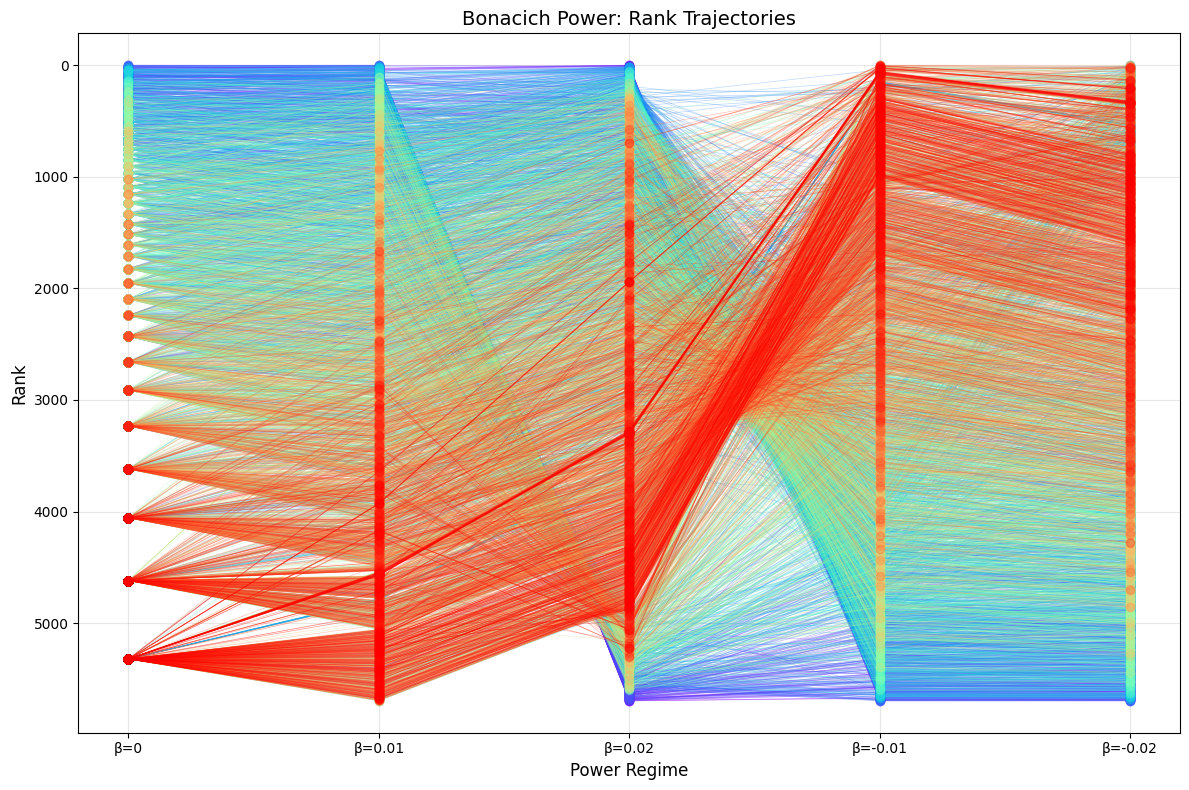


Power Amplifiers:
       rank_0  rank_0.02  rank_change_pos
13673  5320.0     1719.0          -3601.0
34     5320.0     1766.0          -3554.0
13496  5320.0     1767.0          -3553.0
13099  5320.0     1768.0          -3552.0
18941  5320.0     1769.0          -3551.0

Power Inhibitors:
       rank_0  rank_0.02  rank_change_pos
11102    17.5     5695.0           5677.5
16972    19.5     5694.0           5674.5
187      22.5     5696.0           5673.5
12965    50.5     5693.0           5642.5
1377     54.5     5691.0           5636.5


In [12]:
# Analyze power regimes
beta_values = [0, 0.01, 0.02, -0.01, -0.02]
bonacich_df = bonacich.analyze_power_regimes(G, beta_values=beta_values)

print("Bonacich Power Rankings:")
print(bonacich_df.head(10))

# Plot trajectories
fig = visualization.plot_bonacich_trajectories(bonacich_df)
plt.show()

# Analyze rank changes
bonacich_df['rank_change_pos'] = bonacich_df['rank_0.02'] - bonacich_df['rank_0']
bonacich_df['rank_change_neg'] = bonacich_df['rank_-0.02'] - bonacich_df['rank_0']

print("\nPower Amplifiers:")
print(bonacich_df.nsmallest(5, 'rank_change_pos')[['rank_0', 'rank_0.02', 'rank_change_pos']])

print("\nPower Inhibitors:")
print(bonacich_df.nlargest(5, 'rank_change_pos')[['rank_0', 'rank_0.02', 'rank_change_pos']])

In [18]:
# Stable Actors - Data Collection

rank_cols = [col for col in bonacich_df.columns if 'rank_' in str(col)]

bonacich_df['rank_std'] = bonacich_df[rank_cols].std(axis=1)
bonacich_df['rank_range'] = bonacich_df[rank_cols].max(axis=1) - bonacich_df[rank_cols].min(axis=1)

stable_actors = bonacich_df.nsmallest(10, 'rank_std')

print("\nTop 10 Stable Actors:")
print(stable_actors[rank_cols + ['rank_std', 'rank_range']])

print("\nTop 5 Stable Actors Summary:")
for idx, (node_id, row) in enumerate(stable_actors.head(5).iterrows()):
    avg_rank = sum([row[col] for col in rank_cols]) / len(rank_cols)
    print(f"{idx+1}. Node {node_id}: Std={row['rank_std']:.1f}, Range={row['rank_range']:.0f}, Avg Rank={avg_rank:.0f}")


Top 10 Stable Actors:
       rank_0  rank_0.01  rank_0.02  rank_-0.01  rank_-0.02  rank_change_pos  \
20412  2096.0     2049.0     3399.0      3649.0      3658.0           1303.0   
12742  1953.5     1816.0     3353.0      3748.0      3722.0           1399.5   
2055   1953.5     1892.0     3714.0      3809.0      3820.0           1760.5   
3749   1953.5     2114.0     4278.0      3916.0      4002.0           2324.5   
3168   2243.0     2653.0     3624.0      3859.0      4216.0           1381.0   
19733  1823.5     1939.0     3320.0      4000.0      4003.0           1496.5   
19147  1609.5     1328.0     3336.0      3911.0      3606.0           1726.5   
5665   2096.0     2103.0     4402.0      3840.0      4050.0           2306.0   
1151   1953.5     1952.0     3145.0      3881.0      3975.0           1191.5   
11158  1953.5     2101.0     4495.0      3890.0      3939.0           2541.5   

       rank_change_neg     rank_std  rank_range  
20412           1562.0  1011.761736      2355.